<a href="https://colab.research.google.com/github/itharavenikarthik/Machine-learning/blob/main/ML_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/gender_submission.csv")
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gender_submission.csv")
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col]=encoder.fit_transform(df[col])

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [ ]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(class_weight='balanced')

In [ ]:
model.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5238095238095238

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("TP  FP")
print("FN  TN")
print(cm)

TP  FP
FN  TN
[[18 16]
 [24 26]]


In [ ]:
precision = precision_score(y_test, y_pred, zero_division=0)
print("precision:",precision)

precision: 0.42857142857142855


In [ ]:
recall=recall_score(y_test,y_pred,zero_division=0)
print("recall:",recall)

recall: 0.5294117647058824


In [ ]:
f1 = f1_score(y_test, y_pred, zero_division=0)
print("f1 score:",f1)


f1 score: 0.47368421052631576


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

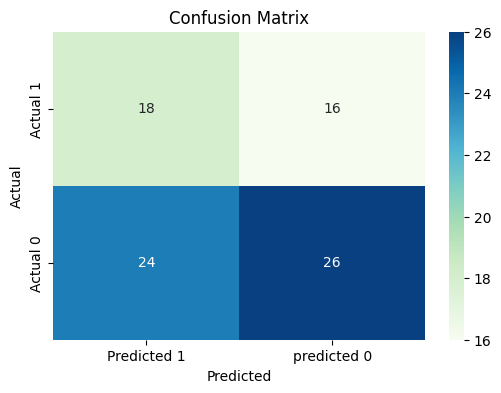

In [ ]:

cn=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True,fmt='d',cmap='GnBu',xticklabels=["Predicted 1", "predicted 0"],yticklabels=["Actual 1","Actual 0"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show

In [ ]:
y_prob = model.predict_proba(x_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.5229411764705882


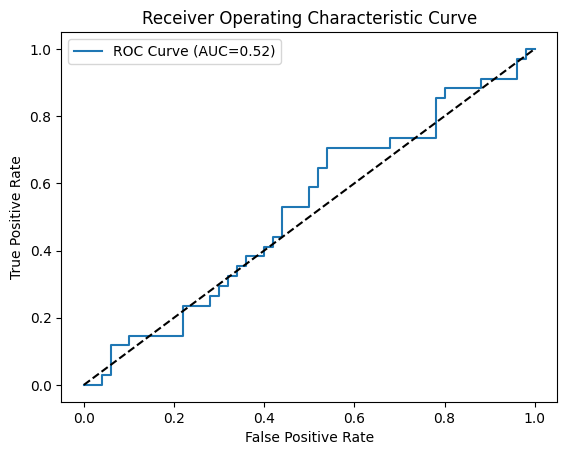

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve (AUC={:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()